In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
# Load in the data
from sklearn.datasets import  load_breast_cancer

In [ ]:
df = load_breast_cancer()

In [ ]:
# check the type of data
type(df)

sklearn.utils.Bunch

In [ ]:
# Note: It is a Bunch object
# This basically acts like a dictionary where you can treat the keys like attributes
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
df.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
df.data.shape

(569, 30)

In [ ]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
df.target.shape

(569,)

In [ ]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.33)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(381, 30) (188, 30) (381,) (188,)


In [ ]:
N, D = X_train.shape
# N = Number of rows
# D = Number of columns

In [ ]:
print(N, D)

381 30


In [ ]:
# Scaling

from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Lets start with the TensorFlow work now.

First we build a model object, which is an object of type "Sequential". This takes in a layer of two objects:

1. Input
2. Dense

Input layer is like a placeholder to specify the size of the input i.e. D in our case.

Next, the real work happens in the Dense layer. It takes in the input and performs a Linear Transformation to get an output of size 1.

We are interested in applying the "sigmoid" activation so that the outputs are in the range 0-1.

In [ ]:
# Build the model

## WAY1
# model = tf.keras.models.Sequential([
#                                     tf.keras.Input(shape=(D,)),
#                                     tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid')
# ])

## WAY2
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

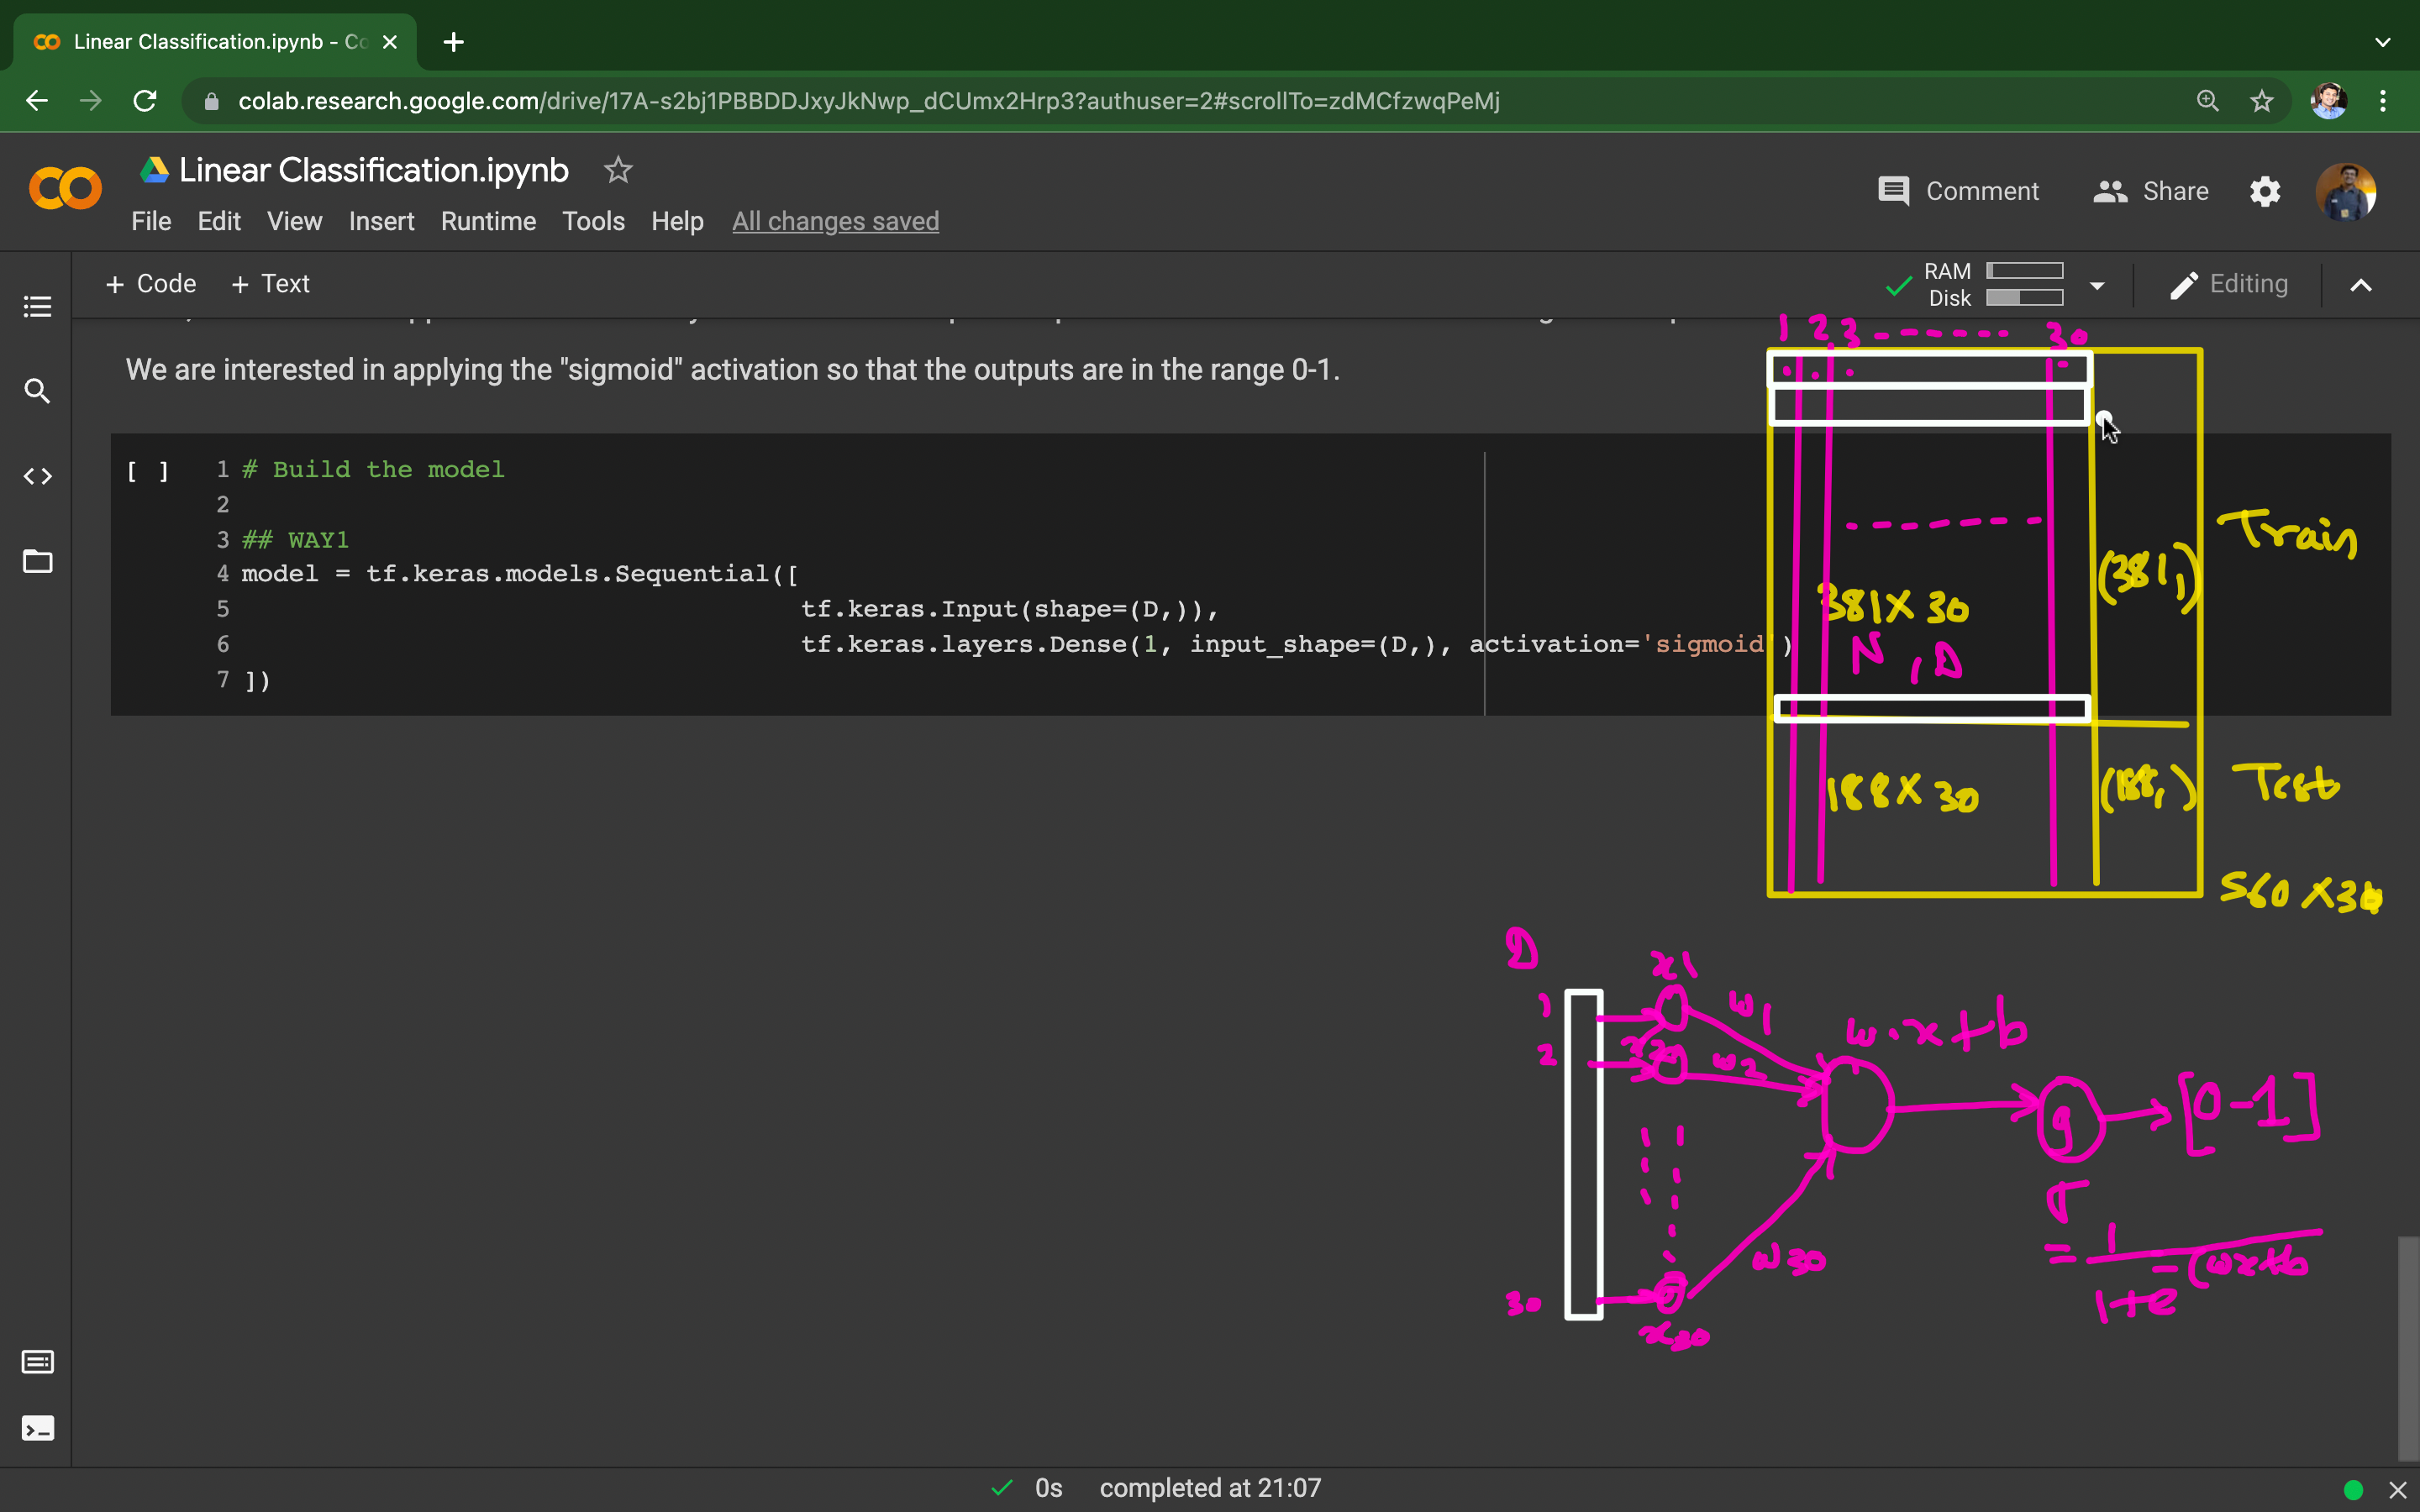

Lets now call the "compile" wherein we pass "adam" as our optimizer, "binary_cross_entropy" as our loss, and "accuracy" as our metrics.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model for 100 epochs i.e 100 times

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 1.9238 - accuracy: 0.1732 - val_loss: 1.9810 - val_accuracy: 0.1649
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.7810 - accuracy: 0.1837 - val_loss: 1.8268 - val_accuracy: 0.1809
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.6421 - accuracy: 0.1969 - val_loss: 1.6773 - val_accuracy: 0.1915
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.5047 - accuracy: 0.2073 - val_loss: 1.5364 - val_accuracy: 0.1968
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1.3793 - accuracy: 0.2467 - val_loss: 1.3990 - val_accuracy: 0.2181
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.2544 - accuracy: 0.2625 - val_loss: 1.2718 - val_accuracy: 0.2500
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1428 - accuracy: 0.2913 - val_loss: 1.1505 - val_accuracy: 0.2766
Epoch 8/100


In [ ]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test)) # ouput in the form of (loss, accuracy)

12/12 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9790
Train score:  [0.11720551550388336, 0.9790025949478149]
6/6 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9628
Test score:  [0.12438401579856873, 0.9627659320831299]


We got good accuracies in both train and test date.

model.fit() return an object "r" that contains the data from the training process.

Lets try plotting the loss per iteration now.

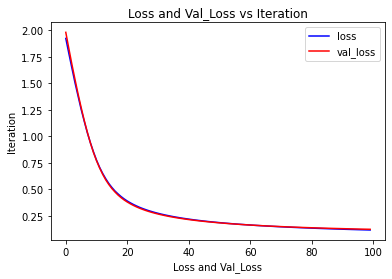

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss', color='b')
plt.plot(r.history['val_loss'], label='val_loss', color='r')
plt.title("Loss and Val_Loss vs Iteration", loc='center')
plt.xlabel("Loss and Val_Loss")
plt.ylabel("Iteration")
plt.legend()
plt.show()

There is a steady decrease in the loss per iteration as expected.

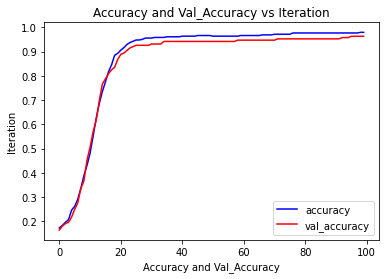

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy', color='b')
plt.plot(r.history['val_accuracy'], label='val_accuracy', color='r')
plt.title("Accuracy and Val_Accuracy vs Iteration", loc='center')
plt.xlabel("Accuracy and Val_Accuracy")
plt.ylabel("Iteration")
plt.legend()
plt.show()

We see a steady increase at each iteration.

# Make Predictions

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[[9.40111220e-01]
 [9.30663347e-01]
 [9.84298050e-01]
 [7.37071037e-04]
 [9.95189667e-01]
 [9.35506284e-01]
 [8.13650727e-01]
 [8.48491073e-01]
 [2.13068724e-03]
 [4.95341301e-01]
 [9.99107122e-01]
 [9.45617020e-01]
 [9.18633938e-01]
 [4.44810301e-01]
 [9.87984240e-01]
 [9.94691432e-01]
 [9.90708709e-01]
 [9.45723832e-01]
 [9.86394644e-01]
 [2.33417481e-01]
 [1.27689034e-01]
 [2.56281495e-02]
 [8.98697019e-01]
 [3.27381492e-03]
 [2.02853024e-01]
 [3.23568881e-02]
 [3.39627743e-01]
 [9.76190805e-01]
 [9.26855803e-01]
 [7.76582241e-01]
 [9.73113120e-01]
 [9.31178331e-01]
 [9.68757391e-01]
 [9.20582294e-01]
 [7.87168145e-01]
 [9.42646027e-01]
 [8.31815958e-01]
 [4.44683433e-03]
 [8.80233705e-01]
 [9.87266302e-01]
 [9.78648126e-01]
 [9.76216197e-01]
 [2.68429518e-04]
 [2.81152725e-02]
 [1.07214719e-05]
 [8.08819890e-01]
 [9.25384939e-01]
 [9.81046915e-01]
 [9.88335252e-01]
 [9.67879415e-01]
 [9.96071577e-01]
 [9.78604198e-01]
 [8.86122584e-01]
 [1.41736865e-03]
 [3.48511636e-02]
 [3.577560

In [ ]:
9.40111220e-01

0.94011122

In [ ]:
8.40158820e-01

0.84015882

In [ ]:
1.01054907e-02

0.0101054907

In [ ]:
y_pred.shape

(188, 1)

In [ ]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,), while the predictions are size (N,1)

import numpy as np
y_pred = np.round(y_pred).flatten()
print(y_pred)

[1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.]


In [ ]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test)) # ouput in the form of (loss, accuracy)

12/12 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9790
Train score:  [0.11720551550388336, 0.9790025949478149]
6/6 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9628
Test score:  [0.12438401579856873, 0.9627659320831299]


In [ ]:
# Claculate the accuracy, compare it to evaluate() output

print("Manually calculated accuracy:",np.mean(y_pred == y_test))

Manually calculated accuracy: 0.9627659574468085


# Saving and Loading a Model

In [ ]:
# model.save('path to save')
model.save('linearclassifier.h5')

In [ ]:
# Check that the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Oct 28 14:30 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Oct 26 13:34 sample_data


Lets say now the model file is downloaded and sent to the client and the client want to consume it i.e. check whether the model created is an acceptable model to him or not.

In [ ]:
client = tf.keras.models.load_model('linearclassifier.h5')
print(client)

In [ ]:
# Checking if we get the same accuracy as we got previously
client.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9628


[0.12438401579856873, 0.9627659320831299]

This is the same accuracy as we got before.

DONE.

In [ ]:
# Download the file - requires Chrome (at this point)

from google.colab import files
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Happy Learning